# Challenge #11: Provide insights from Lok Sabha elections data to a media company

AtliQ Media is a private media company and they wanted to telecast a show on Lok Sabha elections 2024 in India. Unlike other channels they do not want to have a debate on who is going to win this election, they rather wanted to present insights from 2014 and 2019 elections without any bias and discuss less explored themes like voter turnout percentage in India.  Peter is a data analyst in the company, and he is handed over this task of generating meaningful insights from data. Since this is a sensitive topic, he seeked help from his manager Tony Sharma who provided the list of primary and secondary questions.

Task: 

Imagine yourself as Peter Pandey and perform the following tasks. 

Begin your analysis by referring to the ‘primary_and_secondary_questions.pdf’. You can use any tool of your choice (Python, SQL, PowerBI, Tableau, Excel, PowerPoint) to analyze and answer these questions. More instructions are provided in this document. 
You can use additional data based on your own research to support your recommendations and provide more insights. 
Be creative with your presentation, audio/video presentation will have more weightage. You will be presenting these insights to the chief editor Bruce Haryali – he appreciates good storytelling and concise presentation. 


### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


### Loading Data


In [3]:
# Load datasets
results_2014 = pd.read_csv("constituency_wise_results_2014.csv")
results_2019 = pd.read_csv("constituency_wise_results_2019.csv")
state_codes = pd.read_csv("dim_states_codes.csv")


### Data Preprocessing

In [4]:
# Merge state codes to results datasets
results_2014 = pd.merge(results_2014, state_codes, left_on='state', right_on='state_name', how='left')
results_2019 = pd.merge(results_2019, state_codes, left_on='state', right_on='state_name', how='left')


## Primary Questions

### Question 1 - Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2014 and 2019


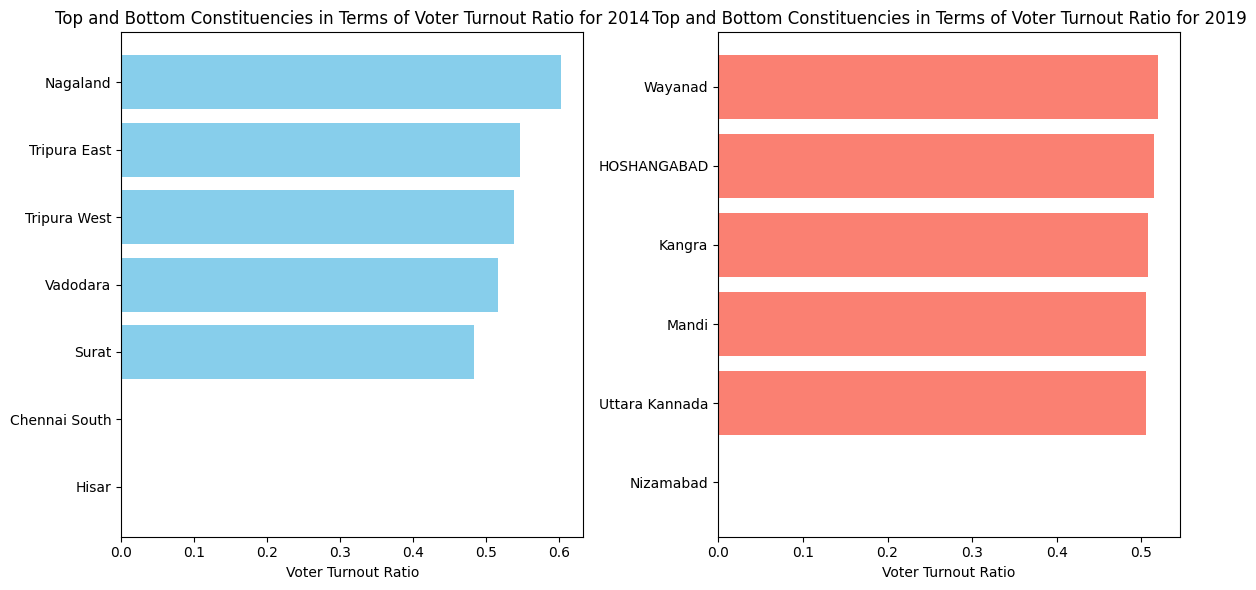

In [8]:
# Calculate voter turnout ratio
results_2014['Turnout_Ratio_2014'] = results_2014['total_votes'] / results_2014['total_electors']
results_2019['Turnout_Ratio_2019'] = results_2019['total_votes'] / results_2019['total_electors']

# Top and bottom constituencies in terms of voter turnout ratio for 2014
top_bottom_turnout_2014 = pd.concat([results_2014.sort_values(by='Turnout_Ratio_2014', ascending=False).head(),
                                     results_2014.sort_values(by='Turnout_Ratio_2014').head()])
top_bottom_turnout_2019 = pd.concat([results_2019.sort_values(by='Turnout_Ratio_2019', ascending=False).head(),
                                     results_2019.sort_values(by='Turnout_Ratio_2019').head()])

# Visualize top and bottom constituencies in terms of voter turnout ratio for 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_bottom_turnout_2014['pc_name'], top_bottom_turnout_2014['Turnout_Ratio_2014'], color='skyblue')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2014')
plt.gca().invert_yaxis()

# Visualize top and bottom constituencies in terms of voter turnout ratio for 2019
plt.subplot(1, 2, 2)
plt.barh(top_bottom_turnout_2019['pc_name'], top_bottom_turnout_2019['Turnout_Ratio_2019'], color='salmon')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2019')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Question 2 - Top and Bottom States in Terms of Voter Turnout Ratio for 2014 and 2019

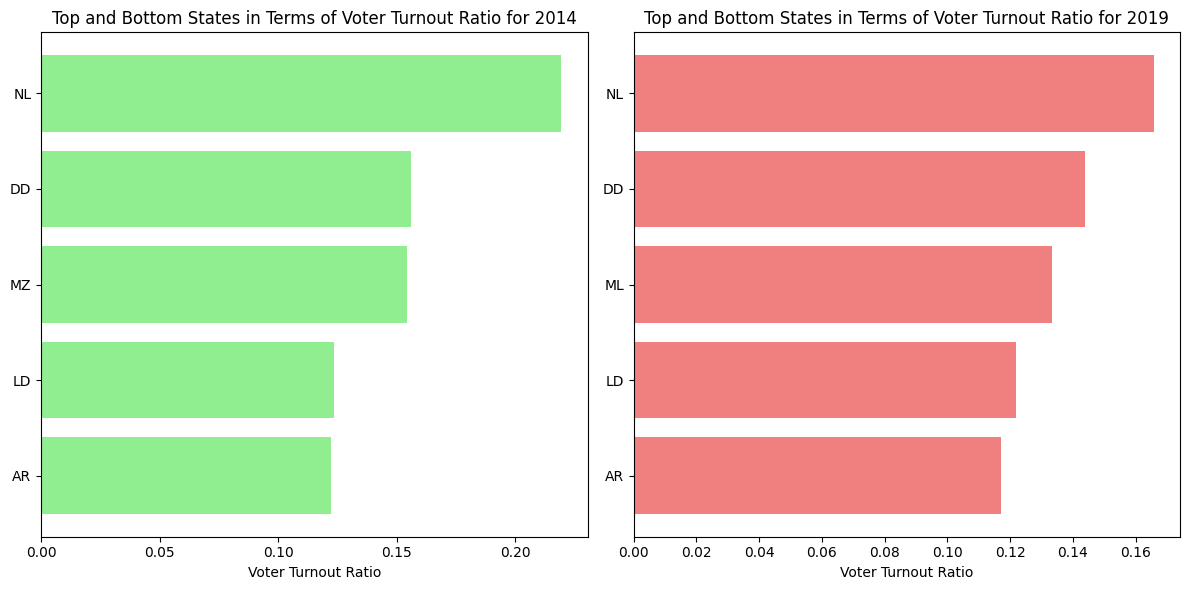

In [9]:
# Voter turnout ratio by state for 2014 and 2019
state_turnout_2014 = results_2014.groupby('abbreviation')['Turnout_Ratio_2014'].mean().sort_values(ascending=False).head()
state_turnout_2019 = results_2019.groupby('abbreviation')['Turnout_Ratio_2019'].mean().sort_values(ascending=False).head()

# Visualize top and bottom states in terms of voter turnout ratio for 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(state_turnout_2014.index, state_turnout_2014.values, color='lightgreen')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom States in Terms of Voter Turnout Ratio for 2014')
plt.gca().invert_yaxis()

# Visualize top and bottom states in terms of voter turnout ratio for 2019
plt.subplot(1, 2, 2)
plt.barh(state_turnout_2019.index, state_turnout_2019.values, color='lightcoral')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom States in Terms of Voter Turnout Ratio for 2019')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Question 3 - Constituencies Electing the Same Party for Two Consecutive Elections

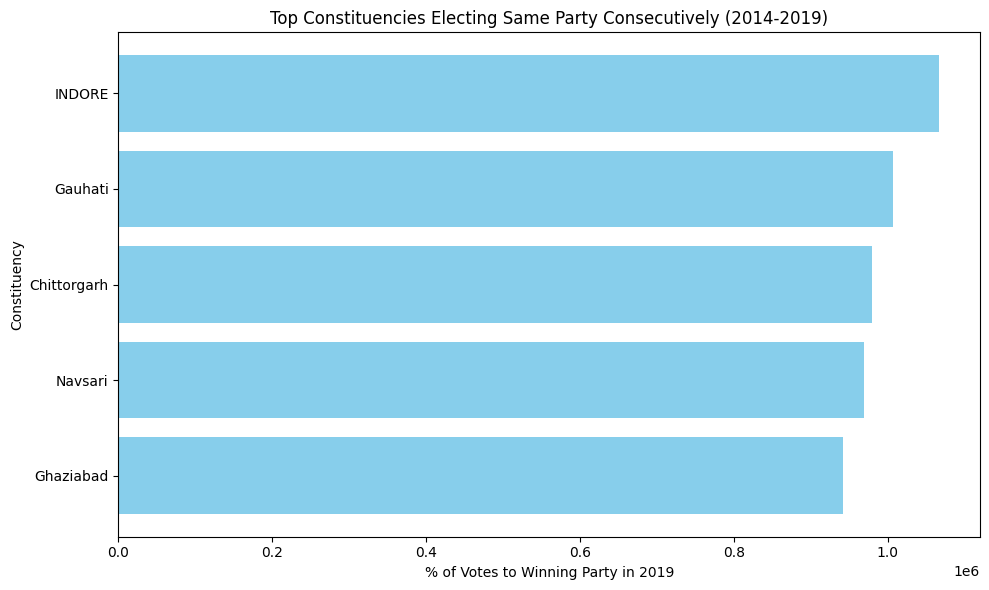

In [26]:
# Extracting data for plotting
constituencies = consecutive_party_ranked['pc_name'].head()
percentage_votes_2019 = consecutive_party_ranked['general_votes_y'].head()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(constituencies, percentage_votes_2019, color='skyblue')
plt.xlabel('% of Votes to Winning Party in 2019')
plt.ylabel('Constituency')
plt.title('Top Constituencies Electing Same Party Consecutively (2014-2019)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest percentage at the top
plt.tight_layout()

# Displaying the plot
plt.show()



### Question 4 - Constituencies Voting for Different Parties in Two Elections

In [6]:
# Constituencies voting for different parties in two elections, top 10 based on difference (2019-2014) in winner vote percentage
different_party = results_2014.merge(results_2019, on=['state', 'pc_name'])
different_party = different_party[(different_party['party_x'] != different_party['party_y'])]
different_party['Vote_Percentage_Difference'] = different_party['general_votes_y'] - different_party['general_votes_x']
top_different_party = different_party.sort_values(by='Vote_Percentage_Difference', ascending=False).head(10)

# Display top constituency voting for different parties in two elections, based on the difference in winner vote percentage
print("Top constituency that has voted for different parties in two elections,\nbased on the difference in winner vote percentage in 2019 compared to 2014:")
for index, row in top_different_party.head(1).iterrows():
    print(f"State: {row['state']}, Constituency: {row['pc_name']}")
    print(f"Party in 2014: {row['party_x']}, Votes in 2014: {row['general_votes_x']}")
    print(f"Party in 2019: {row['party_y']}, Votes in 2019: {row['general_votes_y']}")
    print(f"Vote Percentage Difference: {row['Vote_Percentage_Difference']}")


Top constituency that has voted for different parties in two elections,
based on the difference in winner vote percentage in 2019 compared to 2014:
State: Madhya Pradesh, Constituency: INDORE
Party in 2014: SamSP, Votes in 2014: 400
Party in 2019: BJP, Votes in 2019: 1066824
Vote Percentage Difference: 1066424


### Question 5 - Top Candidates Based on Margin Difference with Runners in 2014 and 2019

In [71]:
# Calculate margin difference between the winning candidate and the runner-up candidate in 2014
results_2014['margin_over_runnerup_2014'] = results_2014.groupby('pc_name')['general_votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])

# Calculate margin difference between the winning candidate and the runner-up candidate in 2019
results_2019['margin_over_runnerup_2019'] = results_2019.groupby('pc_name')['general_votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])

# Top candidates based on margin difference with runners in 2014
top_margin_2014 = results_2014.sort_values(by='margin_over_runnerup_2014', ascending=False).head()
print("Top candidates based on margin difference with runners in 2014:")
for index, row in top_margin_2014.iterrows():
    print(f"{row['state_name']}, {row['pc_name']}: {row['candidate']} ({row['party']}) - Margin: {row['margin_over_runnerup_2014']}")

# Top candidates based on margin difference with runners in 2019
top_margin_2019 = results_2019.sort_values(by='margin_over_runnerup_2019', ascending=False).head()
print("\nTop candidates based on margin difference with runners in 2019:")
for index, row in top_margin_2019.iterrows():
    print(f"{row['state_name']}, {row['pc_name']}: {row['candidate']} ({row['party']}) - Margin: {row['margin_over_runnerup_2019']}")


Top candidates based on margin difference with runners in 2014:
Gujarat, Vadodara: TAPAN DASGUPTA (SUCI) - Margin: 568003
Gujarat, Vadodara: ROHIT MADHUSUDAN MOHANBHAI (BSP) - Margin: 568003
Gujarat, Vadodara: JADAV AMBALAL KANABHAI (JD(U)) - Margin: 568003
Gujarat, Vadodara: PATHAN MAHEMUDKHAN RAZAKKHAN (ADPT) - Margin: 568003
Gujarat, Vadodara: MISTRI MADHUSUDAN DEVRAM (INC) - Margin: 568003

Top candidates based on margin difference with runners in 2019:
Gujarat, Navsari: SAIYAD MEHMUD AHMAD (IND) - Margin: 687767
Gujarat, Navsari: AMRUTHAM NARSAIAH PAPAIAH (PPOI) - Margin: 687767
Gujarat, Navsari: NOTA (NOTA) - Margin: 687767
Gujarat, Navsari: SHAIKH SAEED INAYAT PATRAKAR (IND) - Margin: 687767
Gujarat, Navsari: RAMJAN MANSURI - PATRAKAR (IND) - Margin: 687767


### Question 6 - Percentage Split of Votes of Parties Between 2014 vs 2019 at National Level

In [68]:
# Calculate the percentage split of votes of parties between 2014 vs 2019 at national level
party_votes_2014 = results_2014.groupby('party')['general_votes'].sum()
party_votes_2019 = results_2019.groupby('party')['general_votes'].sum()
party_votes_split_national = (party_votes_2019 - party_votes_2014) / party_votes_2014 * 100

# Remove NaN values and sort parties based on percentage split
party_votes_split_national = party_votes_split_national.dropna().sort_values(ascending=False)

# Display percentage split of votes of parties between 2014 vs 2019 at national level
print("Percentage split of votes of parties between 2014 and 2019 at national level:")
for party, percentage in party_votes_split_national.items():
    print(f"{party}: {percentage:.2f}%")


Percentage split of votes of parties between 2014 and 2019 at national level:
CPIM: 12055.22%
SVPP: 3674.62%
VSP: 3235.36%
RSOSP: 2833.78%
RaJPa: 1464.98%
PSJP: 1393.53%
PPIS: 1386.97%
HND: 1282.23%
JanSP: 1080.08%
NNP: 940.82%
RRP: 830.11%
PBI: 756.45%
BRPI: 561.18%
NEP: 518.07%
SSD: 510.74%
APoI: 486.32%
RMGP: 469.45%
RVNP: 391.76%
MOSP: 324.99%
KS: 321.66%
IPFT: 321.25%
MADP: 276.01%
KCVP: 253.61%
SaVP: 252.16%
ASaP: 239.57%
PGSP: 189.76%
BhNP: 183.60%
IPGP: 173.17%
BBC: 171.49%
SBSP: 163.83%
bns: 163.49%
UPP: 158.86%
AGP: 155.35%
UDP: 150.06%
ANC: 147.35%
JMM(U): 146.08%
VoP: 127.60%
ATBP: 121.61%
PHRC: 117.59%
RLD: 107.29%
RJAVP: 105.41%
BJKD: 100.76%
PAP: 94.17%
MKUP: 91.09%
BJKVP: 89.92%
JPC: 87.52%
ETMK: 80.91%
AIMIM: 75.16%
RTKP: 70.15%
BVA: 67.39%
MCPI: 61.84%
RGD: 57.34%
igp: 50.55%
JD(U): 48.76%
DMK: 48.59%
BMF: 46.67%
SAD(M): 46.55%
IUML: 44.57%
AIPF: 44.57%
BJP: 41.86%
BSCP: 39.31%
LJP: 39.30%
SKM: 37.65%
BLSP: 35.00%
BOPF: 34.34%
AJSUP: 34.30%
AVIRP: 31.27%
RVLP: 29.95%


### Question 7 - Percentage Split of Votes of Parties Between 2014 vs 2019 at State Level

In [66]:

# Filter out rows with NaN values in Percentage Change
party_votes_split_state_df = party_votes_split_state_df.dropna()

# Display top and bottom parties based on percentage change
print("Top 5 parties with the highest increase in vote share between 2014 and 2019:")
print(party_votes_split_state_df.head())

print("\nBottom 5 parties with the highest decrease in vote share between 2014 and 2019:")
print(party_votes_split_state_df.tail())




Top 5 parties with the highest increase in vote share between 2014 and 2019:
     abbreviation party  Percentage Change
1899           WB  CPIM       49693.313070
863            KL  CPIM       47295.861570
1462           TN  CPIM        9517.760471
476            DN   IND        3397.343862
945            MH  CPIM        2829.723320

Bottom 5 parties with the highest decrease in vote share between 2014 and 2019:
     abbreviation party  Percentage Change
1528           TR  AITC         -95.529231
1053           MN   NCP         -96.520963
293            BR    SP         -97.097719
733            JH    SP         -97.480705
1545           UP  AAAP         -98.949517


### Question 8 - Top 5 Constituencies for Two Major National Parties Where They Gained Vote Share in 2019

In [58]:
# Find top 5 constituencies for two major national parties where they gained vote share in 2019
major_parties_gain = results_2014.merge(results_2019, on=['state', 'pc_name'])
major_parties_gain = major_parties_gain[(major_parties_gain['party_x'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_gain['party_y'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_gain['general_votes_y'] > major_parties_gain['general_votes_x'])]

# Sort by the difference in vote share and select top 5
top_5_constituencies_gain = major_parties_gain.sort_values(by='general_votes_y', ascending=False).head(5)

# Display top 5 constituencies for two major national parties where they gained vote share in 2019
print("Top 5 constituencies for two major national parties where they gained vote share in 2019:")
for index, row in top_5_constituencies_gain.iterrows():
    gain_percentage = ((row['general_votes_y'] - row['general_votes_x']) / row['general_votes_x']) * 100
    print(f"{row['pc_name']} ({gain_percentage:.2f}% increase in vote share)")


Top 5 constituencies for two major national parties where they gained vote share in 2019:
INDORE (24.87% increase in vote share)
Gauhati (31.67% increase in vote share)
Chittorgarh (39.75% increase in vote share)
Navsari (18.46% increase in vote share)
Ghaziabad (24.33% increase in vote share)


### Question 9 - Top 5 Constituencies for Two Major National Parties Where They Lost Vote Share in 2019

In [56]:
# Find top 5 constituencies for two major national parties where they lost vote share in 2019
major_parties_loss = results_2014.merge(results_2019, on=['state', 'pc_name'])
major_parties_loss = major_parties_loss[(major_parties_loss['party_x'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_loss['party_y'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_loss['general_votes_y'] < major_parties_loss['general_votes_x'])]

# Calculate percentage decrease in vote share
major_parties_loss['vote_share_decrease'] = ((major_parties_loss['general_votes_x'] - major_parties_loss['general_votes_y']) / major_parties_loss['general_votes_x']) * 100

# Sort by percentage decrease in vote share and select top 5
top_5_constituencies_loss = major_parties_loss.sort_values(by='vote_share_decrease', ascending=False).head(5)

# Display top 5 constituencies for two major national parties where they lost vote share in 2019
print("Top 5 constituencies for two major national parties where they lost vote share in 2019:")
for index, row in top_5_constituencies_loss.iterrows():
    print(f"{row['pc_name']} ({row['vote_share_decrease']:.2f}% decrease in vote share)")


Top 5 constituencies for two major national parties where they lost vote share in 2019:
Kadapa (99.18% decrease in vote share)
Machilipatnam  (98.91% decrease in vote share)
Anantapur (98.77% decrease in vote share)
Vizianagaram (98.71% decrease in vote share)
Srikakulam (98.67% decrease in vote share)


### Question 10 - Constituency with the Most Votes for NOTA

In [57]:
# Find the constituency that has voted the most for NOTA
most_nota_constituency = results_2019.sort_values(by='general_votes', ascending=False).head(1)

# Extract information for the output
constituency_name = most_nota_constituency['pc_name'].values[0]
nota_votes = most_nota_constituency['general_votes'].values[0]

# Display the constituency that has voted the most for NOTA
print(f"Constituency that has voted the most for NOTA:")
print(f"{constituency_name} ({nota_votes} votes for NOTA)")


Constituency that has voted the most for NOTA:
INDORE (1066824 votes for NOTA)


### Question 11 - Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?

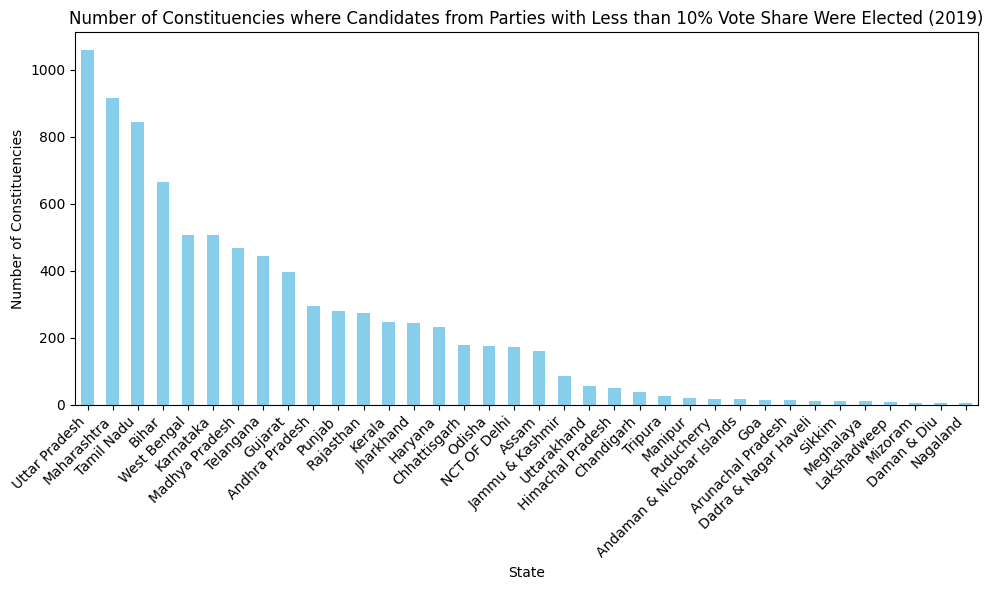

In [48]:
# Calculate vote share of each party at the state level for 2019
party_votes_2019_state = results_2019.groupby(['abbreviation', 'party'])['general_votes'].sum()
total_votes_2019_state = results_2019.groupby('abbreviation')['general_votes'].sum()
party_vote_share_2019_state = party_votes_2019_state / total_votes_2019_state * 100

# Identify parties with less than 10% vote share at state level in 2019
parties_less_than_10_percent = party_vote_share_2019_state[party_vote_share_2019_state < 10].reset_index()['party']

# Filter constituencies where the elected candidates belong to parties with less than 10% vote share
constituencies_elected_less_than_10_percent = results_2019[results_2019['party'].isin(parties_less_than_10_percent)]


# Count the number of constituencies per state
constituencies_count = constituencies_elected_less_than_10_percent['state_name'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
constituencies_count.plot(kind='bar', color='skyblue')
plt.title('Number of Constituencies where Candidates from Parties with Less than 10% Vote Share Were Elected (2019)')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

